In [165]:
# Dependdencies and set up 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st

In [32]:
latest=pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")
historical=pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")

In [33]:
merged=pd.merge(latest,historical,how="outer")
merged.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
merged.fillna(0,inplace=True)
clean_df=merged
clean_df.isnull().sum()
clean_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.0,0.0,0.0,0.0,0.0,0.0
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.0,0.0,0.0,0.0,0.0,0.0
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.0,0.0,0.0,0.0,0.0,0.0
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.0,0.0,0.0,0.0,0.0,0.0
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# player and season, try pie.

### Q4 minutes played vs pace impact in relevance to raptor total

In [41]:
df=clean_df[["player_name","mp","raptor_total","pace_impact"]]
df.head()

,player_name,mp,raptor_total,pace_impact
0,Kareem Abdul-Jabbar,467,9.639006,-0.432080
1,Kareem Abdul-Jabbar,3016,7.342679,-0.513828
2,Zaid Abdul-Aziz,195,-2.295249,-0.751147
3,Tom Abernethy,214,-0.800928,-0.425337
4,Tom Abernethy,1378,0.057838,-0.315821


In [172]:
# Get the averages of minutes played,pace impact and raptor totals of each player.

avg_mp=df.groupby("player_name")["mp"].sum()
avg_pace_impact=df.groupby("player_name")["pace_impact"].sum()
avg_raptor_total=df.groupby("player_name")["raptor_total"].sum()

# Make it into a Dataframe

avg_by_player = pd.DataFrame({"Total Minutes Played": avg_mp,
                             "Total Pace Impact": avg_pace_impact,
                             "Total RAPTOR Scores": avg_raptor_total})
avg_by_player=avg_by_player.reset_index()

# Display the Dataframe

avg_by_player

,player_name,Total Minutes Played,Total Pace Impact,Total RAPTOR Scores
0,A.C. Green,40671,-14.631130,-5.311204
1,A.J. Bramlett,61,0.527413,-9.820485
2,A.J. English,3108,0.003283,-8.779331
3,A.J. Guyton,1246,-0.242884,-16.723745
4,A.J. Lawson,108,4.132765,-29.105705
...,...,...,...,...
3652,Zion Williamson,3650,3.699269,7.994044
3653,Zoran Dragic,75,1.367206,-20.790452
3654,Zoran Planinic,1608,7.956939,-37.845044
3655,Zydrunas Ilgauskas,25088,-4.148363,-5.899477


In [173]:
top_ten_mp=avg_by_player[["player_name","Total Minutes Played"]].\
sort_values(by="Total Minutes Played",ascending=False).head(10)

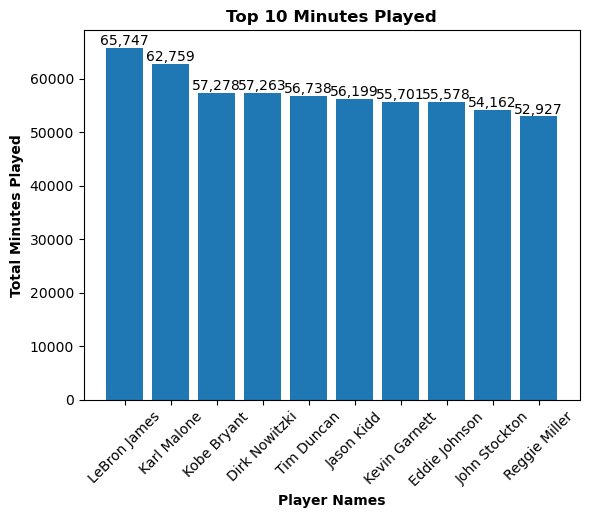

In [176]:
mp=top_ten_mp["Total Minutes Played"]
player_names=top_ten_mp["player_name"]

fig, ax = plt.subplots()
bar_container= ax.bar(player_names,mp)
ax.bar_label(bar_container,fmt='{:,.0f}')
plt.xlabel("Player Names",weight="bold")
plt.ylabel("Total Minutes Played",weight="bold")
plt.title("Top 10 Minutes Played",weight="bold")
plt.xticks(rotation=45)
plt.show()

In [175]:
top_ten_pace_impact=avg_by_player[["player_name","Total Pace Impact"]].\
sort_values(by="Total Pace Impact",ascending=False).head(10)
top_ten_pace_impact

,player_name,Total Pace Impact
3035,Russell Westbrook,45.334515
3206,Stephen Curry,43.601669
609,Chuck Nevitt,39.908693
1879,Josh Davis,34.512570
2299,Marc Iavaroni,31.297726
530,Charles Smith,31.114411
2354,Mark West,30.942662
792,Darryl Dawkins,30.501349
1019,Draymond Green,30.027390
3421,Travis Knight,29.936175


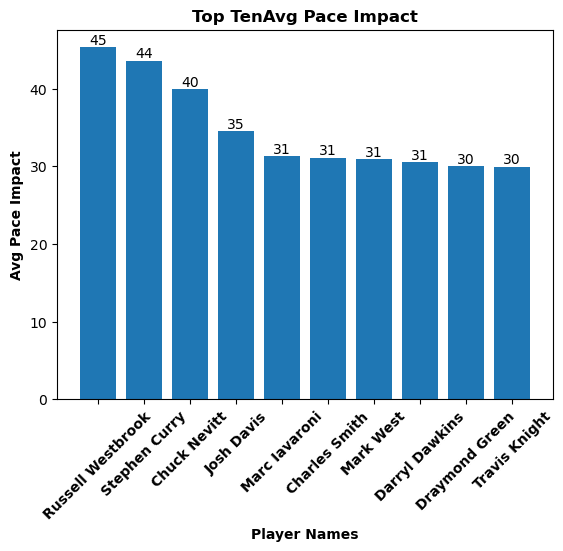

In [181]:
pace_imapct=top_ten_pace_impact["Total Pace Impact"]
player_names=top_ten_pace_impact["player_name"]

fig, ax = plt.subplots()
bar_container= ax.bar(player_names,pace_imapct)
ax.bar_label(bar_container,fmt='{:,.0f}')
plt.xlabel("Player Names",weight="bold")
plt.ylabel("Avg Pace Impact",weight="bold")
plt.title("Top TenAvg Pace Impact",weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.show()

In [185]:
avg_by_player.columns

Index(['player_name', 'Total Minutes Played', 'Total Pace Impact',
       'Total RAPTOR Scores'],
      dtype='object')

In [187]:
top_ten_raptor_total=avg_by_player[["player_name","Total RAPTOR Scores"]].\
sort_values(by="Total RAPTOR Scores",ascending=False).head(10)
top_ten_raptor_total

,player_name,Total RAPTOR Scores
1811,John Stockton,290.365206
2176,LeBron James,280.151964
586,Chris Paul,239.826136
2460,Michael Jordan,234.114848
2194,Lester Conner,194.700100
2268,Magic Johnson,192.363617
3328,Tim Duncan,187.131456
2294,Manu Ginobili,185.421273
1584,Jason Kidd,181.600623
1523,James Harden,177.804488


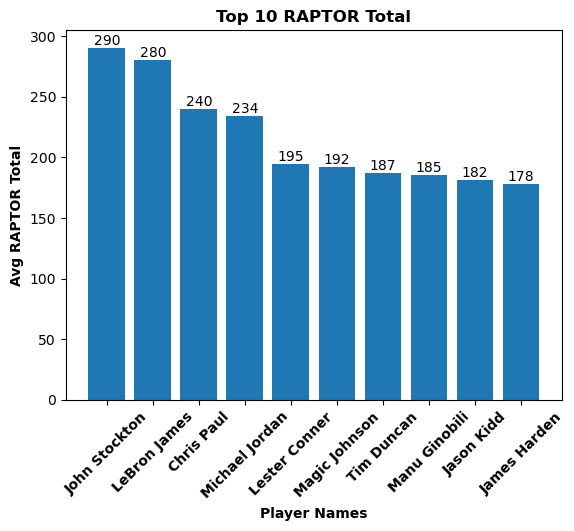

In [188]:
raptor_total=top_ten_raptor_total["Total RAPTOR Scores"]
player_names=top_ten_raptor_total["player_name"]

fig, ax = plt.subplots()
bar_container= ax.bar(player_names,raptor_total)
ax.bar_label(bar_container,fmt='{:,.0f}')
plt.xlabel("Player Names",weight="bold")
plt.ylabel("Avg RAPTOR Total",weight="bold")
plt.title("Top 10 RAPTOR Total",weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.show()

In [191]:
total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()
avg_mp_team=clean_df.groupby("team")["mp"].mean()

avg_summary = pd.DataFrame({"Total Players": total_players,
          "Raptor Total": raptor_total,
          "Possessions": poss,
          "War Total": war_total,
          "Pace Impact": pace_impact,
          "Minutes Played":avg_mp_team,
          "Raptor On and Off Totals":raptor_onoff_total}).reset_index()
avg_summary.head()

,team,Total Players,Raptor Total,Possessions,War Total,Pace Impact,Minutes Played,Raptor On and Off Totals
0,ATL,1185,-1.570031,1642.004219,1.140147,0.263341,819.489451,0.018678
1,BOS,1222,-1.199087,1704.759411,1.448069,0.248033,838.174304,0.033699
2,BRK,340,-1.191441,1366.402941,0.843397,0.275703,666.041176,-0.316375
3,BUF,37,-2.715885,2382.189189,0.983682,0.180248,1068.513514,0.000000
4,CHA,380,-2.366248,1938.507895,0.952573,0.133151,975.000000,-0.145483


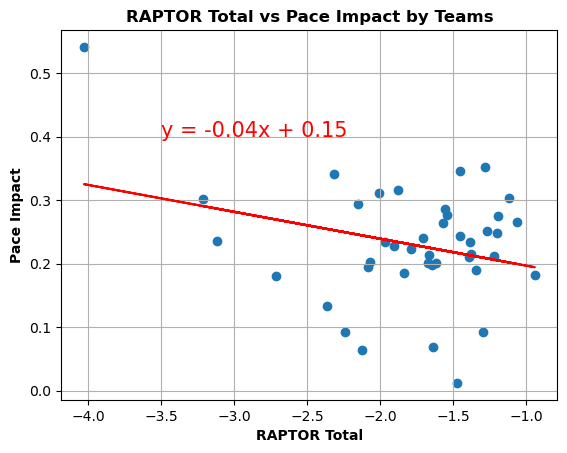

In [195]:
x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["Pace Impact"]

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("RAPTOR Total",weight="bold")
plt.ylabel("Pace Impact",weight="bold")
plt.title("RAPTOR Total vs Pace Impact by Teams",weight="bold")
plt.grid(True)
plt.annotate(line_eq,(-3.5,0.4),fontsize=15,color="red")
plt.show()

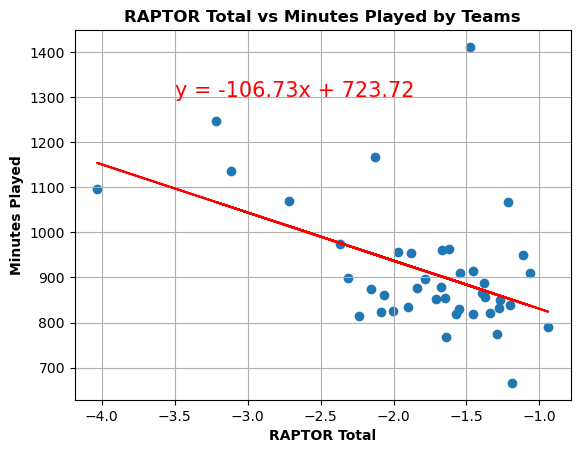

In [196]:
x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["Minutes Played"]

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("RAPTOR Total",weight="bold")
plt.ylabel("Minutes Played",weight="bold")
plt.title("RAPTOR Total vs Minutes Played by Teams",weight="bold")
plt.grid(True)
plt.annotate(line_eq,(-3.5,1300),fontsize=15,color="red")
plt.show()